In [1]:
import numpy as np
from cavity_codes.rfp2 import *
import pickle
from matplotlib.ticker import FormatStrFormatter
fontsize = 14
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
from cavity_codes.Bragg_mirror import *

In [2]:
xlamds = 1.261043e-10
cspeed = 299792458
zsep = 50
ncar = 361
dgrid = 540e-6
dt = zsep*xlamds/cspeed

## Check phase difference

8.74813723564148 seconds to read in fld array (561031905,)
read 4305 slices
1.0013580322265625e-05 seconds to reshape fld array (4305, 361, 361)
8.123628854751587 seconds to read in fld array (561031905,)
read 4305 slices
6.198883056640625e-06 seconds to reshape fld array (4305, 361, 361)
9.285114049911499 seconds to read in fld array (561031905,)
read 4305 slices
0.0008091926574707031 seconds to reshape fld array (4305, 361, 361)
9.103972673416138 seconds to read in fld array (561031905,)
read 4305 slices
1.0251998901367188e-05 seconds to reshape fld array (4305, 361, 361)
9.067080974578857 seconds to read in fld array (561031905,)
read 4305 slices
0.0005714893341064453 seconds to reshape fld array (4305, 361, 361)


Text(0, 0.5, 'Phase difference')

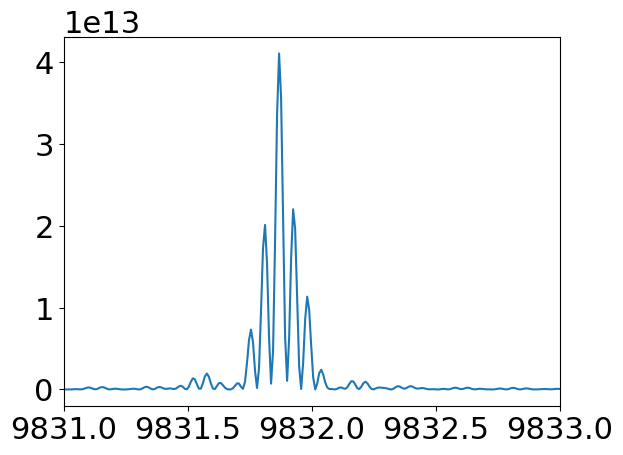

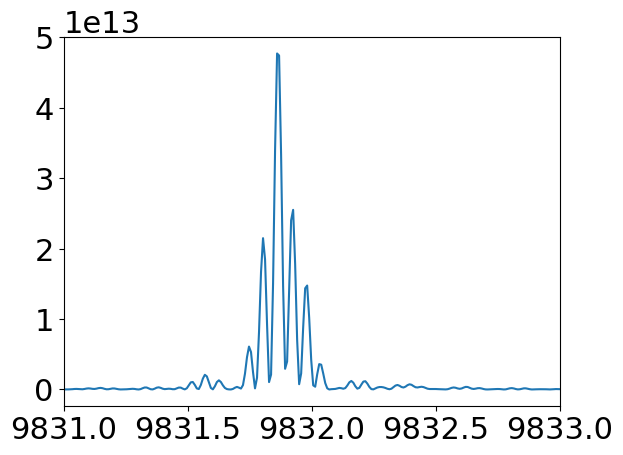

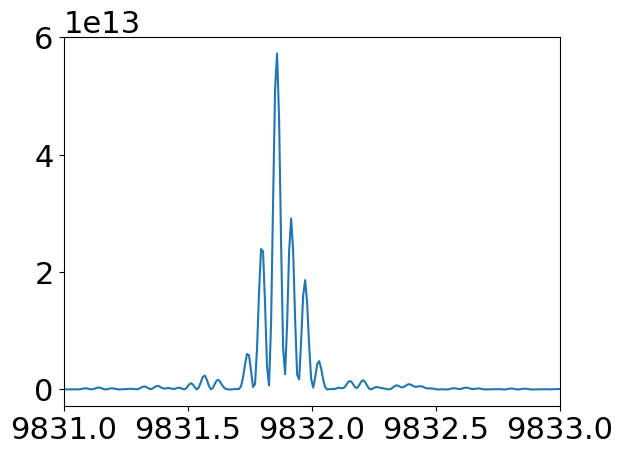

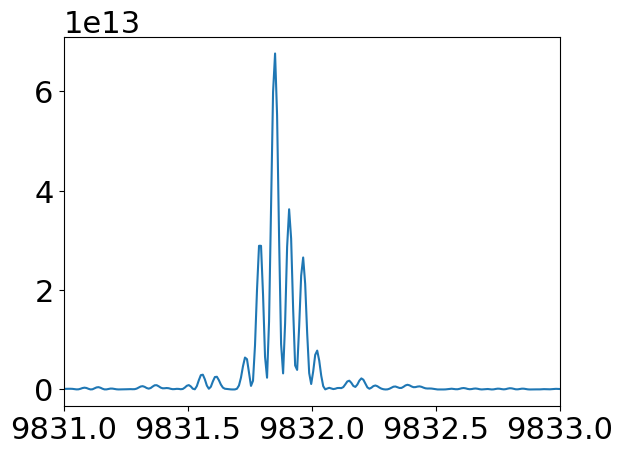

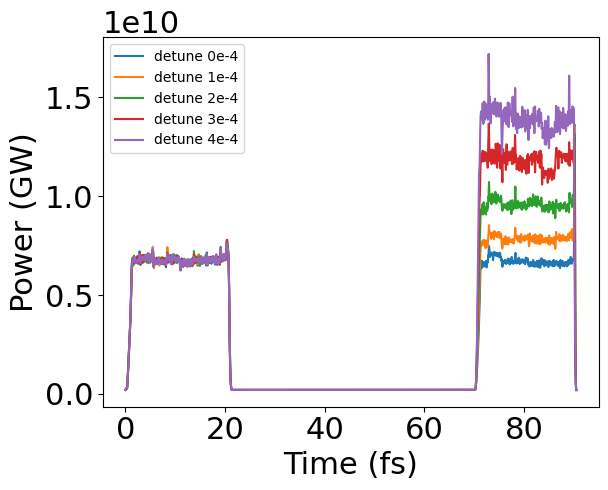

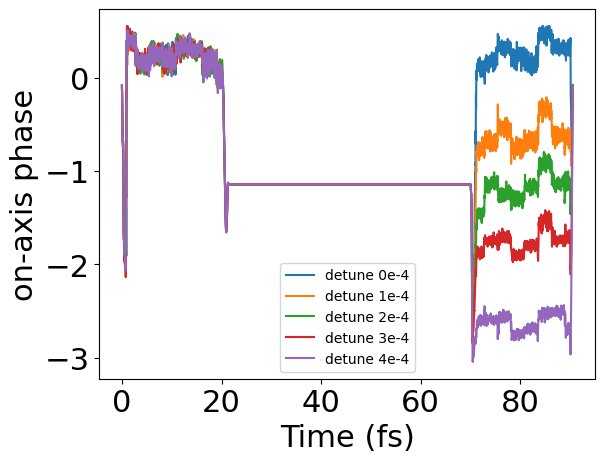

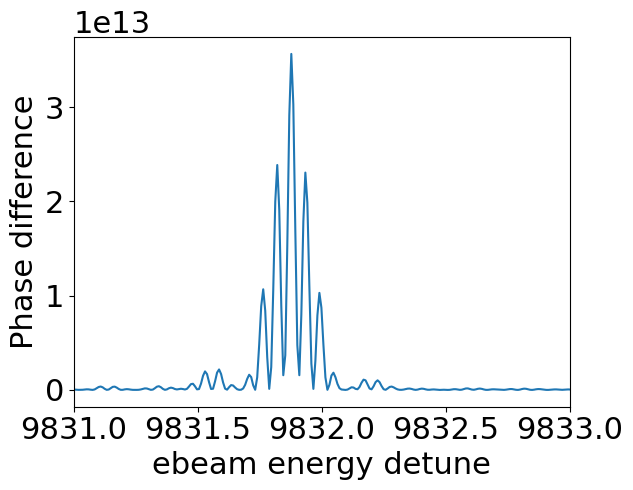

In [16]:
detune  = np.arange(5)
phasediff = []
for i in detune:
    init_file = 'data_phaselock/K1.172_dt0_'+str(int(i)) + '_f' + str(int(i)) + '.out.dfl'
    dfl = read_dfl(init_file, ncar=ncar)
    power = np.sum(np.abs(dfl)**2, axis = (1,2))
    
    s = np.arange(dfl.shape[0])*dt*1e15
    mid_field = dfl[:, ncar//2 + 1, ncar//2 + 1]
    phase  = np.angle(mid_field)
    amp = np.abs(mid_field)
    plt.figure(1)
    plt.plot(s, power, label = 'detune ' + str(i)  + 'e-4')
    plt.xlabel('Time (fs)')
    plt.ylabel('Power (GW)')
    plt.figure(2)
    plt.plot(s, phase, label = 'detune ' + str(i)  + 'e-4')
    plt.xlabel('Time (fs)')
    plt.ylabel('on-axis phase')
    phase1 = np.mean(phase[(s>2) &(s < 18)])
    phase2 = np.mean(phase[(s>72) &(s < 88)])
    phasediff.append(phase1 - phase2)
    
    hws, spec = get_spectrum(dfl, zsep, xlamds, npad = (10000, 10000), onaxis=True)
    plt.figure()
    plt.plot(hws, spec)
    plt.xlim([9831, 9833])
    
plt.figure(1)
plt.legend(fontsize = 10)
plt.figure(2)
plt.legend(fontsize = 10)

plt.figure(3)
plt.plot(detune*1e-4, phasediff)
plt.xlabel('ebeam energy detune')
plt.ylabel('Phase difference')

Text(0, 0.5, 'Phase difference')

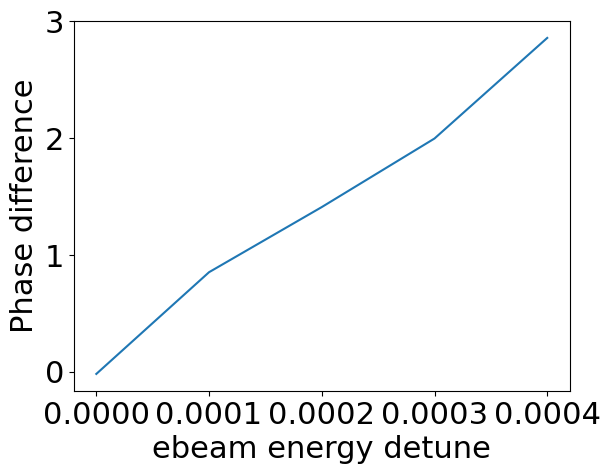

In [17]:
plt.figure(3)
plt.plot(detune*1e-4, phasediff)
plt.xlabel('ebeam energy detune')
plt.ylabel('Phase difference')

4.056209087371826 seconds to read in fld array (313161363,)
read 2403 slices
1.3828277587890625e-05 seconds to reshape fld array (2403, 361, 361)
3.9776241779327393 seconds to read in fld array (313161363,)
read 2403 slices
6.4373016357421875e-06 seconds to reshape fld array (2403, 361, 361)
3.8164656162261963 seconds to read in fld array (313161363,)
read 2403 slices
7.152557373046875e-06 seconds to reshape fld array (2403, 361, 361)
3.9132909774780273 seconds to read in fld array (313161363,)
read 2403 slices
0.0006692409515380859 seconds to reshape fld array (2403, 361, 361)
3.7356677055358887 seconds to read in fld array (313161363,)
read 2403 slices
6.67572021484375e-06 seconds to reshape fld array (2403, 361, 361)


Text(0, 0.5, 'Phase difference')

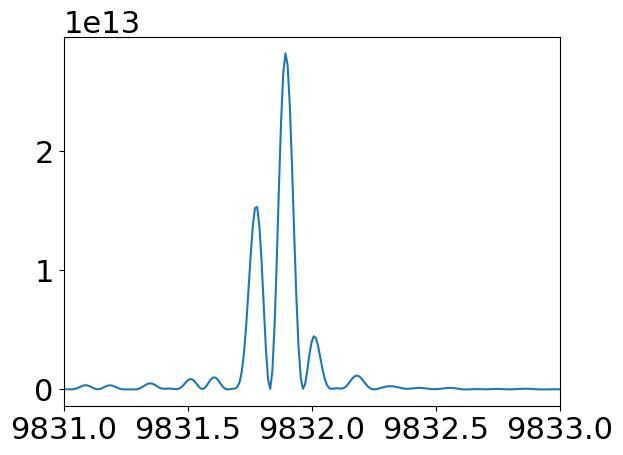

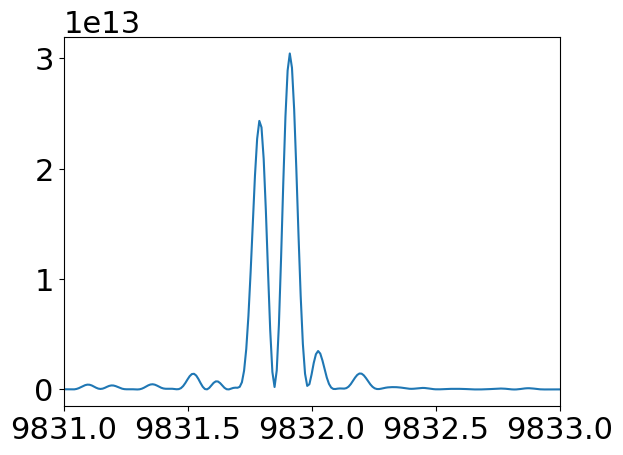

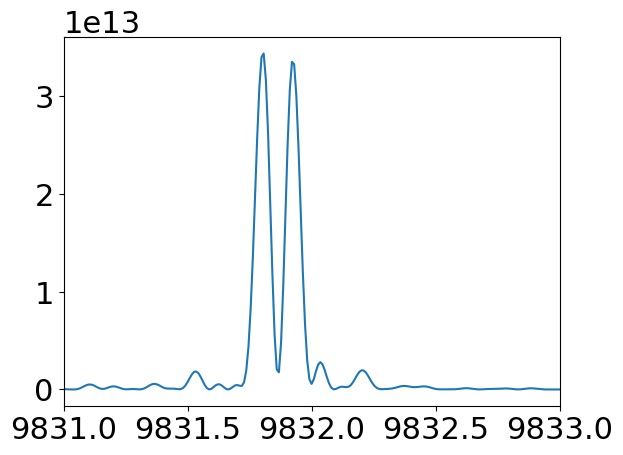

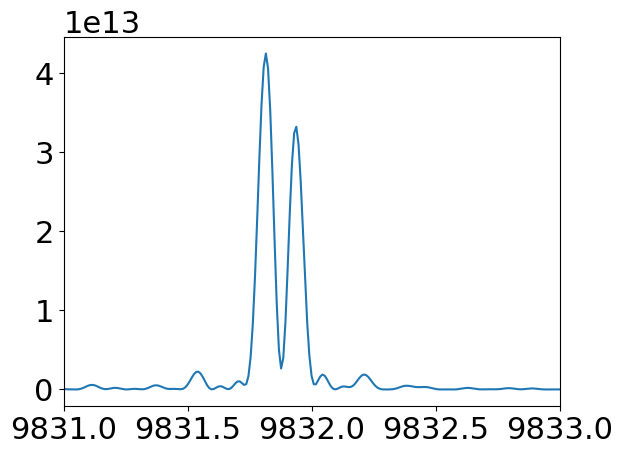

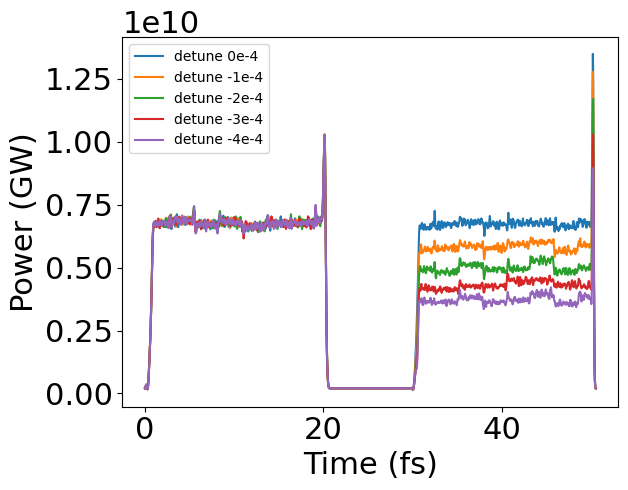

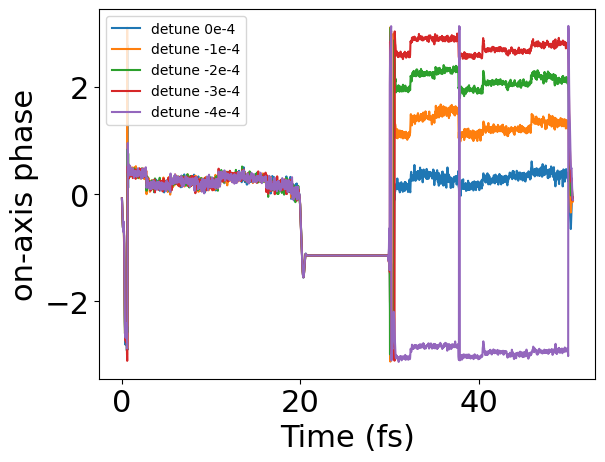

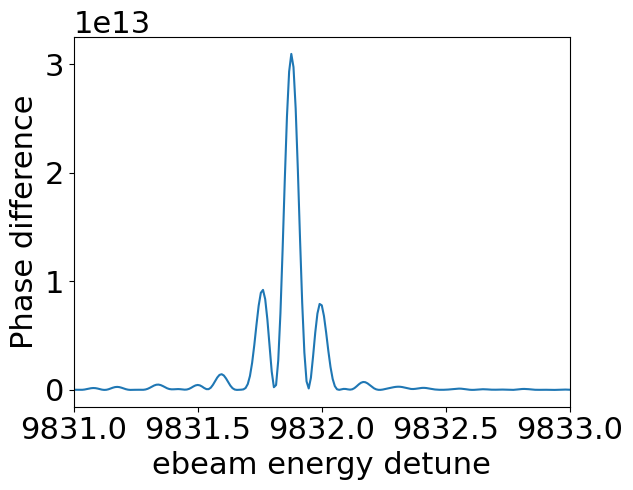

In [14]:
detune  = -1*np.arange(5)
phasediff = []
for i in detune:
    init_file = 'data_phaselock/K1.172_dt0_'+str(int(i)) + '_e' + str(int(abs(i))) + '.out.dfl'
    dfl = read_dfl(init_file, ncar=ncar)
    power = np.sum(np.abs(dfl)**2, axis = (1,2))
    hws, spec = get_spectrum(dfl, zsep, xlamds, npad = (10000, 10000), onaxis=True)
    s = np.arange(dfl.shape[0])*dt*1e15
    mid_field = dfl[:, ncar//2 + 1, ncar//2 + 1]
    phase  = np.angle(mid_field)
    amp = np.abs(mid_field)
    plt.figure(1)
    plt.plot(s, power, label = 'detune ' + str(i)  + 'e-4')
    plt.xlabel('Time (fs)')
    plt.ylabel('Power (GW)')
    
    plt.figure(2)
    plt.plot(s, phase, label = 'detune ' + str(i)  + 'e-4')
    plt.xlabel('Time (fs)')
    plt.ylabel('on-axis phase')
    phase1 = np.mean(phase[(s>5) &(s < 15)])
    phase2 = np.mean(phase[(s>35) &(s < 45)])
    phasediff.append(phase1 - phase2)
    
    plt.figure()
    plt.plot(hws, spec)
    plt.xlim([9831, 9833])
plt.figure(1)
plt.legend(fontsize = 10)
plt.figure(2)
plt.legend(fontsize = 10)

plt.figure(3)
plt.plot(detune*1e-4, np.unwrap(phasediff))
plt.xlabel('ebeam energy detune')
plt.ylabel('Phase difference')

# Plot output power vs passes

In [8]:
folder_name = 'data_phaselock'
result = []
extrac = []
nRound =20

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[1])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

power = result
out_power = extrac

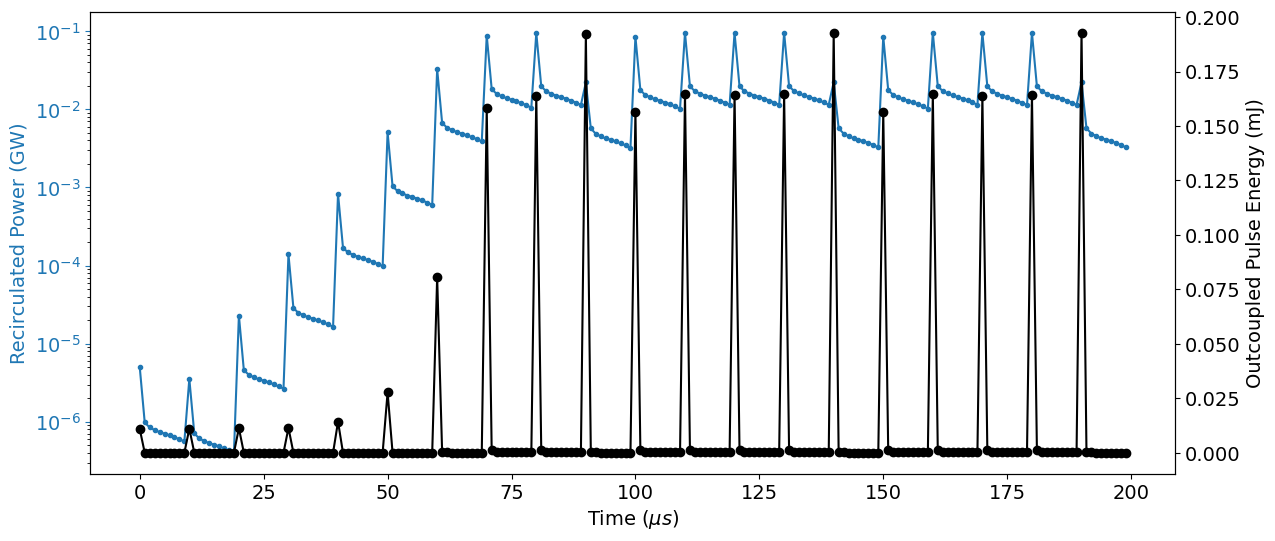

In [9]:
fontsize = 14
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
#plt.plot(x[::10], np.array(power)[::10], 'o', label = 'w/ ebeam')
#plt.plot(x[90::50], np.array(power)[90::50], 'o', label = 'chirped ebeam')
#plt.plot(x[::10], power[::10],'o', color = 'C2', label = 'w/ flat ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
#plt.legend(fontsize = fontsize -2, loc = 'upper left')
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C0', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

ax2.plot(np.array(out_power)/1e3, '-o',color = 'k')
ax2.set_ylabel('Outcoupled Pulse Energy (mJ)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')

## Plot power and spectrum

### dfl before filter

In [34]:

init_file = 'data_phaselock/K1.172_dt0_4_d4.out.dfl'
dfl = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl, dt = dt)
plot_fld_marginalize_t(dfl, dgrid = dgrid, dt=dt)



FileNotFoundError: [Errno 2] No such file or directory: 'data_phaselock/K1.172_dt0_5_d5.out.dfl'

### dfl after filter

5.562460660934448 seconds to read in fld array (268378112,)
read 8192 slices
0.0010831356048583984 seconds to reshape fld array (8192, 181, 181)
norm = 43883287165243.97     energy = 1476.7  uJ    t , y  mean = -26.3 fs , 0.1 um      t , y  rms = 56.3 fs , 45.0 um     wt , wy = 112.6 fs , 90.0 um     t , y  fwhm = 0.2 fs , 88.4 um


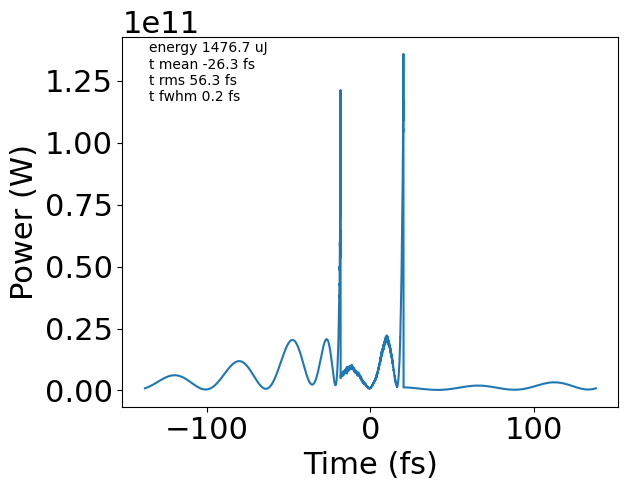

In [ ]:
init_file = 'data_testbw_flat_40/n9_field_transmit_round0.dfl'
dfl2 = read_dfl(init_file, ncar=ncar)
plot_fld_power(dfl2, dt = dt)
plot_fld_marginalize_t(dfl2, dgrid = dgrid, dt=dt)

In [28]:
power = np.sum(np.abs(dfl)**2, axis = (1,2))
t = dt*np.arange(dfl.shape[0])/1e-15

Text(0, 0.5, 'Power (GW)')

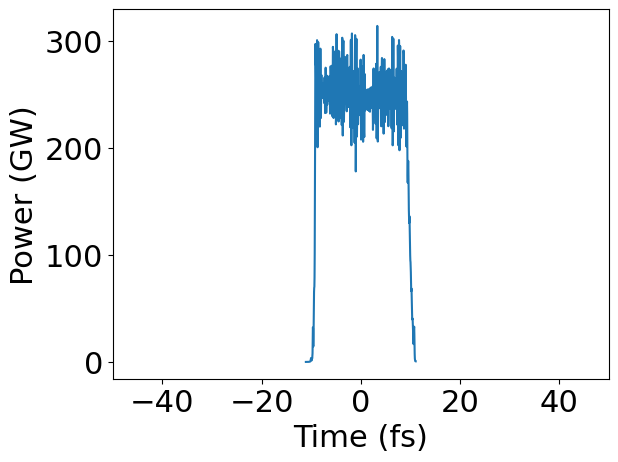

In [29]:
plt.figure()

plt.plot(t - np.mean(t), power/1e9)
plt.xlim([-50,50])
plt.xlabel('Time (fs)')
plt.ylabel('Power (GW)')

## Plot spectrum

In [30]:
(dfl2.shape[0]-dfl.shape[0])/2

3766.5

1860.5560768047847
0.1880113417589881


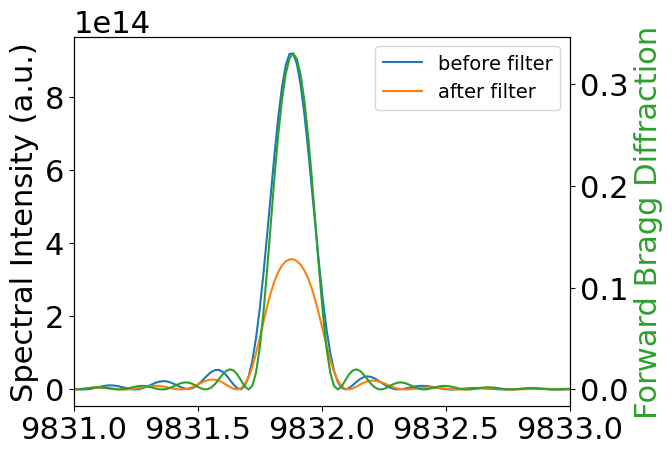

In [33]:
hws, spec = get_spectrum(dfl, zsep, xlamds, npad = (3766, 3767), onaxis=True)
hws2, spec2 = get_spectrum(dfl2, zsep, xlamds, npad = (0,0), onaxis=True)

R0H, R00 = get_Bragg_mirror_response_eph(eph = hws,  theta_0=np.pi/4., d = 5e-6)
R0H = R0H.squeeze()
R00 = R00.squeeze()

ratio = spec2/spec
print(max(ratio))
plt.plot(hws, spec,label = 'before filter')
plt.plot(hws2, spec2, label = 'after filter')
plt.legend(fontsize = 14)
#plt.plot(hws, spec*R00,'-o')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(hws, R0H,  color = 'C2', alpha = 1.0)

plt.xlim([9831, 9833])
plt.xlabel('Photon energy (eV)')
ax.set_ylabel('Spectral Intensity (a.u.)')
ax2.set_ylabel('Forward Bragg Diffraction', color ='C2')

bw = fwhm(spec)[0]*np.mean(np.diff(hws))
print(bw)

In [13]:
len(spec2)

8192

## Plot transverse divergence

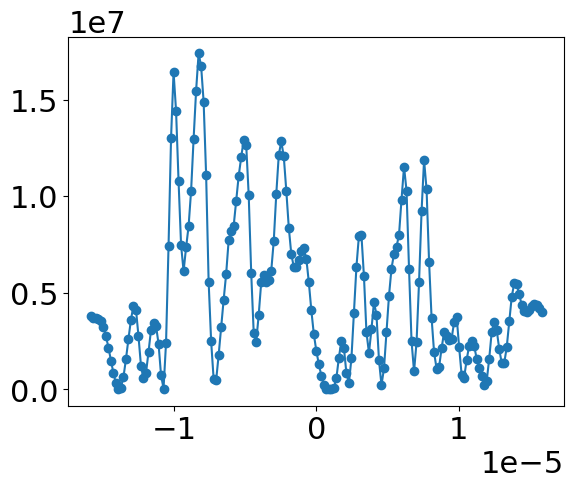

In [29]:
npadx = 0
dx = 2. * dgrid / ncar
Dkx = 2. * np.pi / dx
Dtheta = Dkx * xlamds / 2. / np.pi
theta = Dtheta / 2. * np.linspace(-1.,1.,ncar+2*npadx)

dfl_slice = dfl[dfl.shape[0]//2 + 1,:,dfl.shape[2]//2 + 1]

dfl_xt = np.fft.fftshift(np.fft.fft(dfl_slice))
prof_xt = np.abs(dfl_xt)**2
plt.plot(theta, prof_xt,'-o')
#plt.xlim(-5e-6, 5e-6)

In [94]:
fontsize = 14
power_record = []
spectra_record0 = []
spectra_record1 = []
for k in np.arange(5, 31):

    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append((s_fs, power))
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 5000, onaxis=True)
    spectra_record0.append((hws, spectra))

    
    filename = 'tap0.03_K1.172_n' + str(k) + '.out.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    hws, spectra = get_spectrum(fld, zsep, xlamds, npad = 4569, onaxis=True)
    spectra_record1.append((hws, spectra))

n5_field_transmit_round0.dfl


NameError: name 'folder_name' is not defined

In [7]:
import pickle

dump_name = folder_name + '/' + 'spectra.p'

pickle.dump( (spectra_record0, spectra_record1), open(dump_name, "wb" ) )

In [9]:
center_list = []
for hws, spectra in spectra_record0:
    center = np.sum(hws*spectra)/np.sum(spectra)
    center_list.append(center)

dw = np.mean(center_list) - hw0
np.std(center_list)

0.013899217104059256

NameError: name 'Eph' is not defined

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

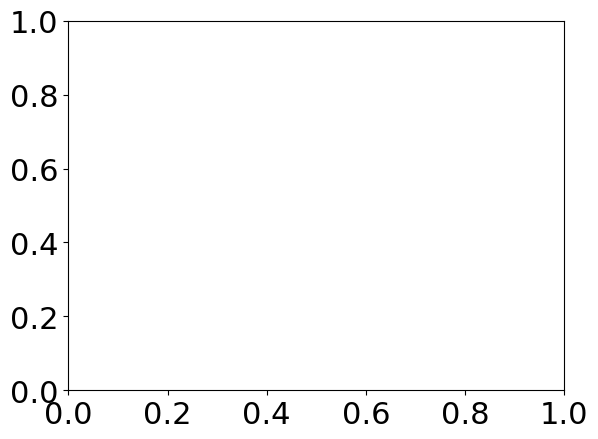

In [26]:

plt.figure()
spectra_ax = plt.gca()
spectra_ax.plot(Eph, R0H, color = 'C0', alpha = 0.7)
spectra_ax.set_xlim([9830,9834])
spectra_ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
spectra_ax2 = spectra_ax.twinx()
#spectra_ax.text(-0.05, 1.05, '(c)', transform=spectra_ax.transAxes, 
#            size=fontsize)

for hws, spectra in spectra_record0:
    spectra_ax2.plot(hws, spectra/np.max(spectra), alpha = 0.5, linewidth = 2, label = 'Outcoupled')
    
#for hws, spectra in spectra_record1[1:]:
#    spectra_ax2.plot(hws, spectra/np.max(spectra), linewidth = 2, linestyle='dashed', color  = 'k', alpha = 0.5, label = 'Post-Unds')

0.022666604167808333

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

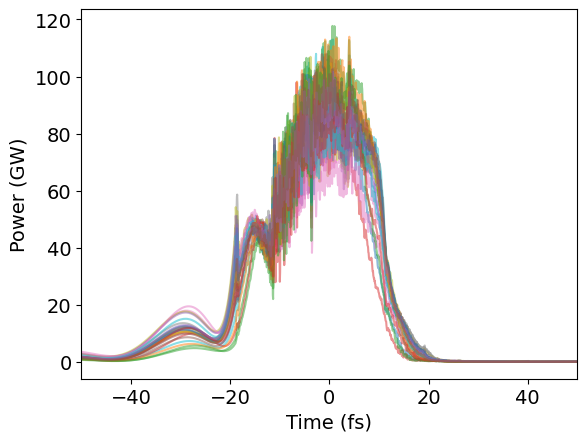

In [10]:
plt.figure()
power_ax  = plt.gca()
for s_fs, power in power_record:
    power_ax.plot(s_fs + 10, power/1e9, alpha = 0.5)
    power_ax.set_xlim([-50, 50])
power_ax.set_xlabel('Time (fs)', fontsize = fontsize)
power_ax.set_ylabel('Power (GW)', fontsize = fontsize)
power_ax.tick_params(axis='y', labelsize=fontsize)
power_ax.tick_params(axis='x', labelsize=fontsize)
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

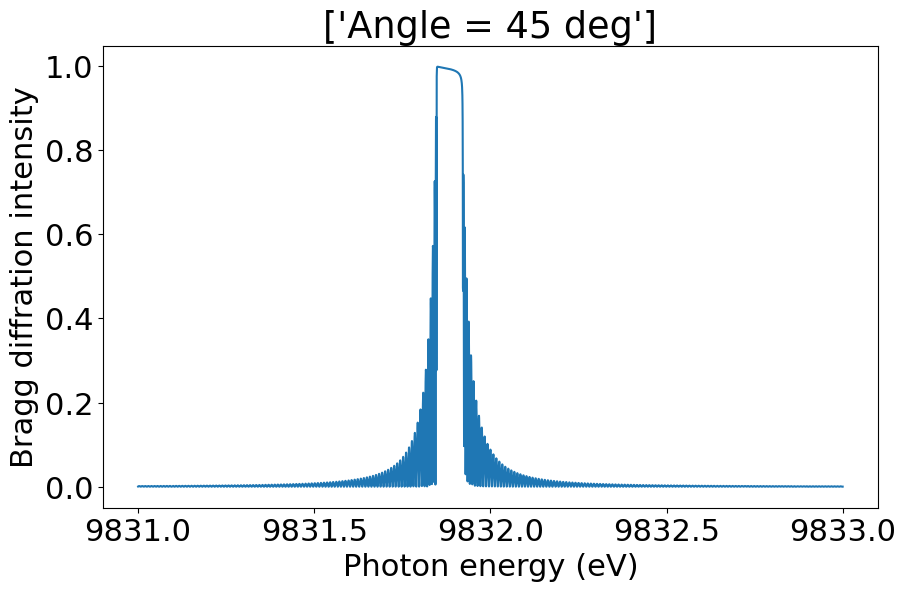

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

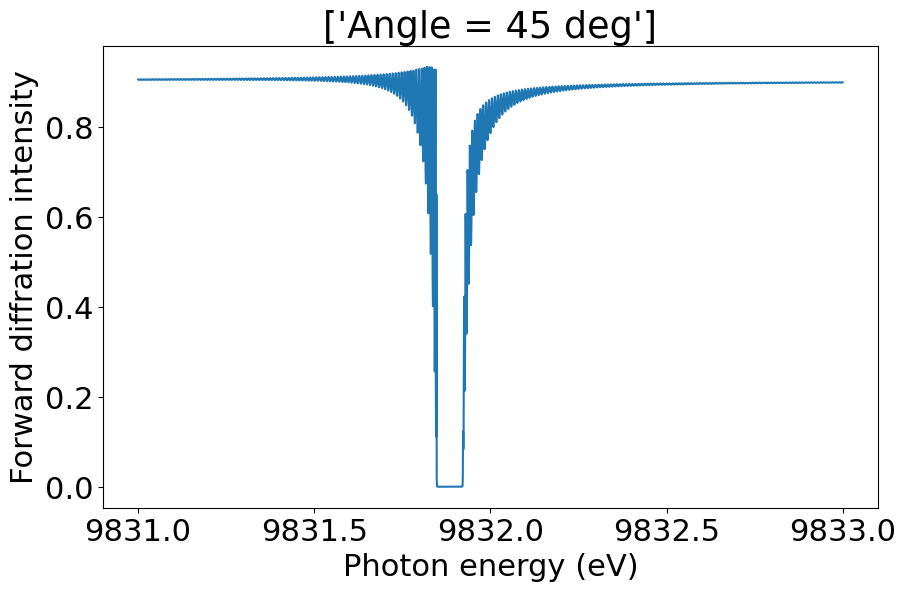

In [8]:
from cavity_codes.Bragg_mirror import *
Eph, R0H, R00 = plot_Bragg_mirror_response_slice(d = 100e-6)

## long cavity

In [119]:
x = np.zeros((512,181,8096), dtype = complex)
import sys
sys.getsizeof(x)/1e9

12.00436032

In [2]:
ncar = 181
dgrid = 540e-6
xlamds = 1.7834064e-10
zsep = 200
c_speed  = 299792458
nslice = 1024
isradi = 1
npadt = (8192 - nslice//isradi)//2
npad1 = (1024-ncar)//2
npadx = [int(npad1), int(npad1) + 1]
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_3GeV'

In [4]:
energy_list = []
maxpower_list = []
xrms_list = []
yrms_list = []
xfwhm_list = []
yfwhm_list = []
for  n in range(1, 9):
  
    filename = 'n' + str(n) + '_seed_init'  +'.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
    energy_list.append(energy_uJ)
    maxpower_list.append(maxpower)
    xrms_list.append(xrms)
    yrms_list.append(yrms)
    xfwhm_list.append(xfwhm)
    yfwhm_list.append(yfwhm)

n1_seed_init.dfl
5.3186140060424805 seconds to read in fld array (268378112,)
read 8192 slices
0.0003609657287597656 seconds to reshape fld array (8192, 181, 181)
n2_seed_init.dfl
4.704545021057129 seconds to read in fld array (268378112,)
read 8192 slices
5.7220458984375e-06 seconds to reshape fld array (8192, 181, 181)
n3_seed_init.dfl
5.283662557601929 seconds to read in fld array (268378112,)
read 8192 slices
0.0006160736083984375 seconds to reshape fld array (8192, 181, 181)
n4_seed_init.dfl
5.88710355758667 seconds to read in fld array (268378112,)
read 8192 slices
1.1444091796875e-05 seconds to reshape fld array (8192, 181, 181)
n5_seed_init.dfl
5.470254898071289 seconds to read in fld array (268378112,)
read 8192 slices
0.0013430118560791016 seconds to reshape fld array (8192, 181, 181)
n6_seed_init.dfl
5.183549165725708 seconds to read in fld array (268378112,)
read 8192 slices
2.1696090698242188e-05 seconds to reshape fld array (8192, 181, 181)
n7_seed_init.dfl
5.463650941848

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


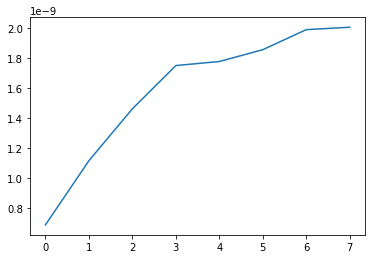

In [5]:
plt.plot(maxpower_list)

In [13]:

energy_list = []
maxpower_list = []
xrms_list = []
yrms_list = []
xfwhm_list = []
yfwhm_list = []
for  n in range(7):
    for round in range(1):
        filename = 'n' + str(n) + '_field_transmit_round' + str(round) +'.dfl'
        print(filename)
        fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
        energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
        energy_list.append(energy_uJ)
        maxpower_list.append(maxpower)
        xrms_list.append(xrms)
        yrms_list.append(yrms)
        xfwhm_list.append(xfwhm)
        yfwhm_list.append(yfwhm)

        

n0_field_transmit_round0.dfl
5.7258312702178955 seconds to read in fld array (268378112,)
read 8192 slices
0.0011551380157470703 seconds to reshape fld array (8192, 181, 181)
energy = 14.811497916215uJ, peakpower = 3.050350777953GW, trms = 8.301792569606fs, tfwhm = 0.360679845639fs, xrms = 174.961143383933um, xfwhm = 574.180772133929um, yrms = 174.961143383933um, yfwhm = 571.059087333834um, 
n1_field_transmit_round0.dfl
5.199463605880737 seconds to read in fld array (268378112,)
read 8192 slices
8.106231689453125e-06 seconds to reshape fld array (8192, 181, 181)
energy = 17.441082362125uJ, peakpower = 2.478669194917GW, trms = 10.348834156922fs, tfwhm = 0.316601570714fs, xrms = 174.140439101229um, xfwhm = 573.588122514774um, yrms = 174.140439101229um, yfwhm = 572.198959425824um, 
n2_field_transmit_round0.dfl
5.384433031082153 seconds to read in fld array (268378112,)
read 8192 slices
6.67572021484375e-06 seconds to reshape fld array (8192, 181, 181)
energy = 99.240171822182uJ, peakpower

FileNotFoundError: [Errno 2] No such file or directory: 'data_long/n6_field_transmit_round0.dfl'

In [14]:
out_power = np.zeros((10*len(maxpower_list),))
out_power[::10] = np.array(maxpower_list)

In [16]:
data = pickle.load( open( folder_name + '/data_process/recir_info.p', "rb" ) )
power  = data[0]

In [ ]:
x = np.arange(len(power))
plt.plot(np.array(power),'.-', color = 'C2', label = 'w/o ebeam')
plt.plot(x[::10], np.array(power)[::10], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = 11)
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C2', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()
ax2.plot(out_power, color = 'C1')
ax2.set_ylabel('Outcoupled Power (GW)', color = 'C1', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C1')
plt.savefig(folder_name + '/data_process/' + 'recir_power.png',bbox_inches='tight')

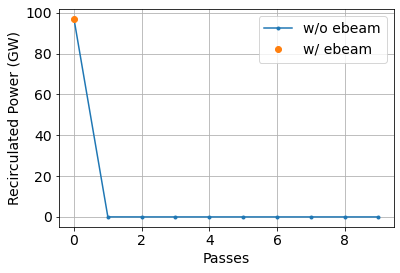

In [8]:
fontsize = 14
plt.plot(maxpower_list,'.-', label = 'w/o ebeam')

ax = plt.gca()
#ax.set_yscale('log')

x = np.arange(len(maxpower_list))
plt.plot(x[::10], maxpower_list[::10],'o', color = 'C1', label = 'w/ ebeam')
plt.xlabel('Passes', fontsize = fontsize)
plt.ylabel('Recirculated Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.grid()
plt.savefig(folder_name + '/' + 'recir_power.png',bbox_inches='tight')

In [17]:
pickle.dump((maxpower_list, energy_list, xrms_list,yrms_list,xfwhm_list, yfwhm_list), open( folder_name + '/data_process/recir_info.p', "wb" ) )

In [7]:

spectra_list = []
power_list = []
for  n in [5]:
    filename = 'n' + str(n) + '_field_transmit_round0' +'.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
    hws, spectra = get_spectrum(fld, dt, xlamds, npad = 100, onaxis=False)
    spectra_list.append((hws,spectra))
    power_GW = np.sum(np.abs(fld)**2, axis = (1,2))/1e9
    power_GW = power_GW[3000:-3000]
    t_fs = dt*np.arange(len(power_GW))/1e-15
    power_list.append((t_fs, power_GW))

    

n5_field_transmit_round0.dfl
5.195975303649902 seconds to read in fld array (268378112,)
read 8192 slices
7.867813110351562e-06 seconds to reshape fld array (8192, 181, 181)
energy = 2402.213418uJ, peakpower = 104.532649GW, trms = 21.065374fs, tfwhm = 18.363578fs, xrms = 45.742078um, xfwhm = 68.579283um, yrms = 45.742078um, yfwhm = 68.826779um, 


In [41]:
SASE = 'tap0.006_K1.172_n28.out.dfl'
fld = read_dfl(filename = folder_name + '/'+SASE, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
hws_sase, spectra_sase = get_spectrum(fld, dt, xlamds, npad = 100, onaxis=False)

0.4401230812072754 seconds to read in fld array (23522398,)
read 718 slices
1.5497207641601562e-05 seconds to reshape fld array (718, 181, 181)


norm = 3763184657022.8228     energy = 316.6  uJ    t , y  mean = -12.2 fs , 0.5 um      t , y  rms = 6.8 fs , 16.9 um     wt , wy = 13.6 fs , 33.8 um     t , y  fwhm = 16.1 fs , 25.9 um


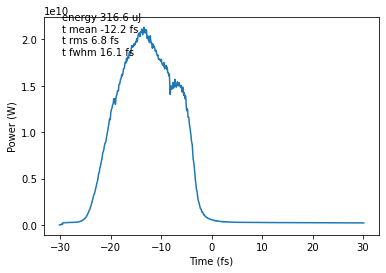

In [42]:
plot_fld_power(fld, dt)

In [54]:
(1.172-1.165)/1.172

0.0059726962457336994

In [16]:
from Bragg_mirror import *
eph = np.linspace(9820,9845,2000)
theta_0 = 45.0*np.pi/180.
dtheta_0 = 10e-6
ntheta_0 = 2000
theta = np.linspace(theta_0-dtheta_0,theta_0+dtheta_0,ntheta_0)
R = Bragg_mirror(photon_energies_eV = eph, angles_rad = theta, reflectionQ=True, undo_slippageQ=True, undo_xshiftQ=True)

5.7770925916231105e-06


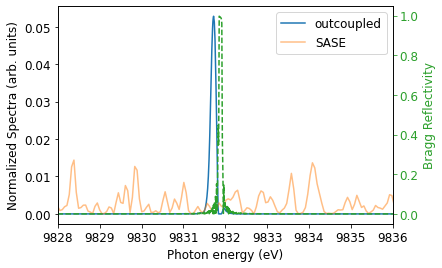

In [13]:
fontsize = 12
plt.figure(1)
plt.plot(hws,spectra,label = 'outcoupled')

plt.plot(hws_sase, spectra_sase, alpha = 0.5, label = 'SASE')
plt.xlabel('Photon energy (eV)', fontsize = fontsize)
plt.ylabel('Normalized Spectra (arb. units)', fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.xlim([9828, 9836])
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(eph, np.abs(R[1000,:])**2,'--',color = 'C2')
ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
plt.savefig(folder_name + '/data_process/' + 'spectra.png',bbox_inches='tight')

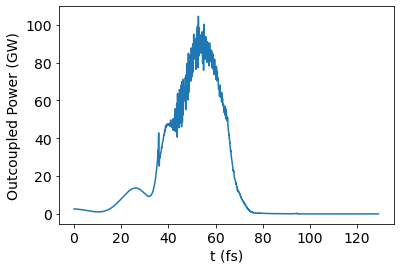

In [16]:
from scipy.signal import savgol_filter
power_GW_filtr = power_GW#savgol_filter(power_GW, 9, 3)
fontsize = 14
plt.plot(t_fs,  power_GW_filtr)
plt.xlabel('t (fs)', fontsize = fontsize)
#plt.xlim([0,100])
plt.ylabel('Outcoupled Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig(folder_name + '/data_process/' + 'power.png', bbox_inches='tight')

## 3GeV beam

In [16]:
ncar = 181
dgrid = 540e-6
w0 =40e-6
#xlamds = 1.7834064e-10
xlamds = 1.261043e-10
zsep = 140
c_speed  = 299792458
nslice = 1024
isradi = 1
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_short_stats'


5.7770925916231105e-06


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


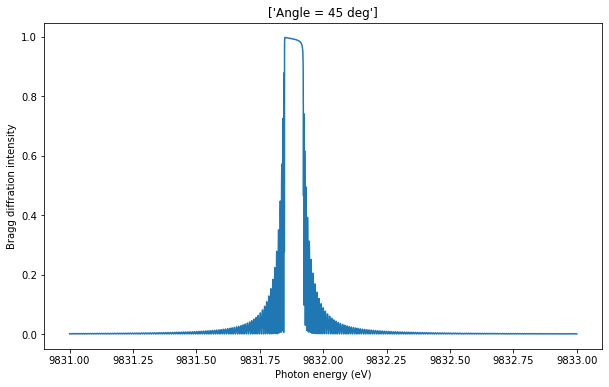

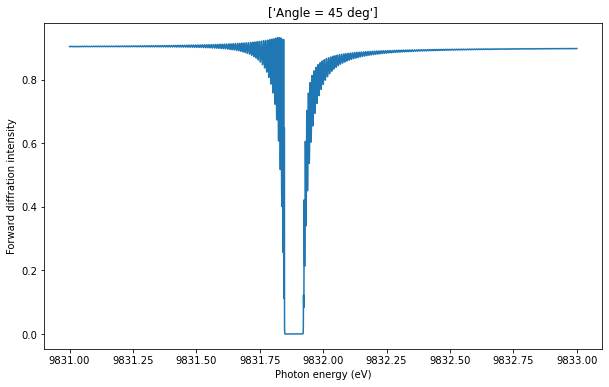

In [17]:
from cavity_codes.Bragg_mirror import *
Eph, R0H, R00 = plot_Bragg_mirror_response_slice(d = 100e-6)
import numpy as np
from cavity_codes.rfp2 import get_spectrum, read_dfl, plot_fld_power
import matplotlib.pyplot as plt

n3_field_transmit_round0.dfl
3.455638885498047 seconds to read in fld array (268509156,)
read 8196 slices
6.4373016357421875e-06 seconds to reshape fld array (8196, 181, 181)
0.45066213607788086 seconds to read in fld array (33940396,)
read 1036 slices
5.7220458984375e-06 seconds to reshape fld array (1036, 181, 181)


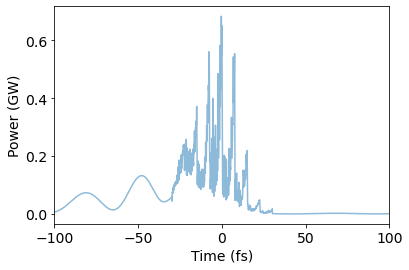

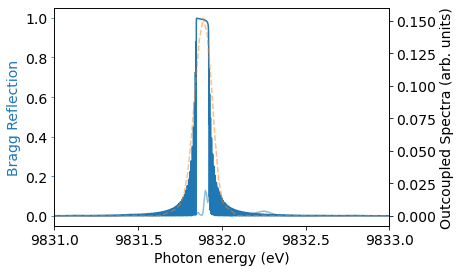

In [18]:
plt.figure(2)
plt.plot(Eph, R0H, color = 'C0')
ax = plt.gca()
ax2 = ax.twinx()
fontsize = 14
power_record = []
spectra_record0 = []
spectra_record1 = []
for k in np.arange(3, 4):

    filename = 'n'+str(int(k)) + '_field_transmit_round0.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    power = np.sum(np.abs(fld)**2,axis = (1,2))
    s_fs = np.arange(len(power))*dt/1e-15
    s_fs -= np.mean(s_fs)
    power_record.append
    plt.figure(1)
    plt.plot(s_fs, power/1e9, alpha = 0.5)
    plt.xlim([-100, 100])
    hws, spectra = get_spectrum(fld, dt, xlamds, npad = 1000, onaxis=False)
    plt.figure(2)
    ax2.plot(hws, spectra, alpha = 0.5)
    
    filename = 'tap0.006_K1.172_n' + str(k) + '.out.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    hws, spectra = get_spectrum(fld, dt, xlamds, npad = 1000, onaxis=False)
    ax2.plot(hws, spectra, alpha = 0.5, linestyle = '--')
    
    #plt.xlim([6951, 6953])
    plt.xlim([9831,9833])

plt.figure(1)
plt.xlabel('Time (fs)', fontsize = fontsize)
plt.ylabel('Power (GW)', fontsize = fontsize)
axt  = plt.gca()
axt.tick_params(axis='y', labelsize=fontsize)
axt.tick_params(axis='x', labelsize=fontsize)
plt.savefig('figures/3GeV_short_cavity_1MHz_power.pdf', bbox_inches ="tight")

plt.figure(2)
ax.set_xlabel('Photon energy (eV)', fontsize = fontsize)
ax2.set_ylabel('Outcoupled Spectra (arb. units)', fontsize = fontsize)
ax.set_ylabel('Bragg Reflection',color  = 'C0', fontsize = fontsize)
ax.tick_params(axis='y', labelsize=fontsize, color = 'C0')
ax.tick_params(axis='x', labelsize=fontsize)
ax2.tick_params(axis='y', labelsize=fontsize)
plt.savefig('figures/3GeV_short_cavity_1MHz_spectra.pdf', bbox_inches ="tight")


#plt.xlabel('Photon energy (eV)', fontsize = fontsize)
#plt.ylabel('Outcoupled Spectra (arb. units)', fontsize = fontsize)
#plt.xlim([9831, 9833])
#plt.xticks(fontsize= fontsize)
#plt.yticks(fontsize = fontsize)
#ax = plt.gca()
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax2 = ax.twinx()
#ax2.plot(eph, np.abs(R[2501,:])**2,alpha = 0.7,color = 'C2')
#ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
#ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
#plt.savefig(folder_name  + '/spectra.pdf',bbox_inches='tight')

In [1]:
folder_name = 'data_short_stats'
result = []
extrac = []
nRound = 11

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

power = result
out_power = extrac

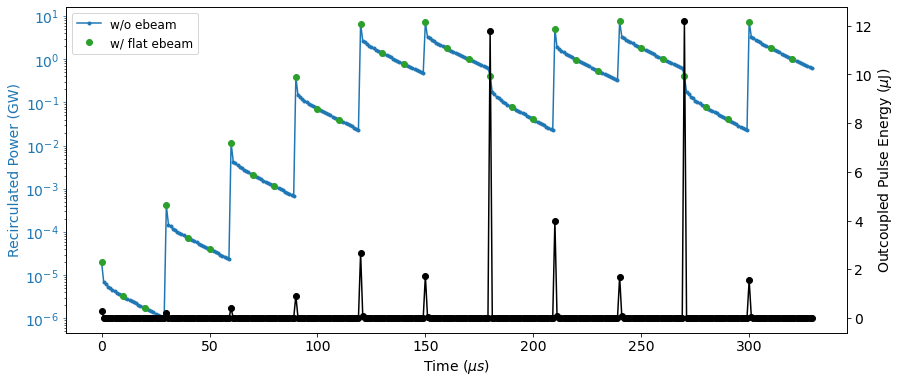

In [45]:
fontsize = 14
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
plt.plot(x[::10], power[::10],'o', color = 'C2', label = 'w/ flat ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = fontsize -2, loc = 'upper left')
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C0', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

ax2.plot(np.array(out_power), '-o',color = 'k')
ax2.set_ylabel('Outcoupled Pulse Energy ($\mu$J)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')

#plt.savefig('figures/3GeV_short_cavity_1MHz.pdf', bbox_inches ="tight")

## Process Stats test

In [398]:
folder_name = 'data_long_stats_400_w0r'
result = []
extrac = []
nRound=11

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

power = result
out_power = extrac

In [401]:
len(out_power)

100

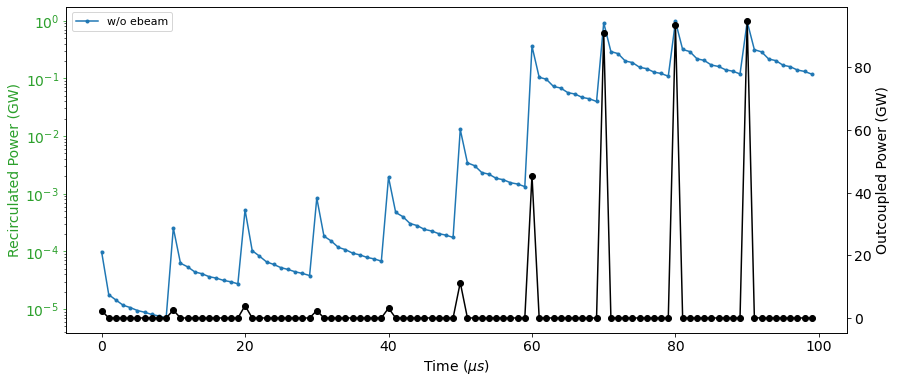

In [404]:
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
#plt.plot(x[::30], power[::30],'o', color = 'C2', label = 'w/ flat ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = 11, loc = 'upper left')
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C2', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

ax2.plot(out_power, '-o',color = 'k')
ax2.set_ylabel('Outcoupled Power (GW)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')

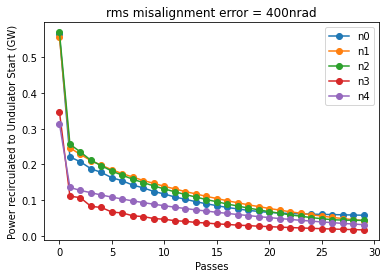

In [91]:
folder_name = 'test_short_400'
result = []
extrac = []
nRound=5
plt.figure(1)
for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    plt.plot(power_list,'-o',label='n' + str(iteration))

plt.xlabel('Passes')
plt.ylabel('Power recirculated to Undulator Start (GW)')
plt.title('rms misalignment error = 400nrad')
plt.legend()

## Test beam center jitter with ABCD matrix

In [45]:
def drift(d):
    return np.array([[1,d,0], [0,1,0], [0,0,1]])
def Merror(dtheta):
    return np.array([[-1,0,0],[0,-1,-2*dtheta],[0,0,1]])
def lens(f):
    return np.array([[1,0,0], [-1/f,1,0],[0,0,1]])

In [63]:
xlamds = 1.261043e-10
#600
#M1 = 33510.93232610154 
#M2 = -76538.80633504392 
#M3 = -99136.96869056678
#M4 = -95777.98526072034

#400
M1 = 64321.5573049364
M2 = 9001.244586578989
M3 = -45935.776549619804
M4 = -8309.768204209093
fac = 4*np.pi/xlamds
dtheta1 = M1/fac
dtheta2 = M2/fac
dtheta3 = M3/fac
dtheta4 = M4/fac

print(dtheta1*1e9, dtheta2*1e9, dtheta3*1e9, dtheta4*1e9)

l_undulator = 3.9*32
l_cavity = 149
d1 = (l_cavity - l_undulator)/2
dw = 0.5
f =75

645.4707733655783 90.32804160831425 -460.96833560893845 -83.38903369256413


In [64]:
# initial vector (x, theta,1)
init = np.array([0, 0, 1])

In [65]:
drift0 = drift(l_undulator)
drift1 = drift(d1)
Merror1 = Merror(dtheta1)
drift2 = drift(dw)
lens1 = lens(f)
drift3 = drift(dw)
Merror2 = Merror(dtheta2)
drift4 = drift(l_cavity)
Merror3 = Merror(dtheta3)
drift5 = drift(dw)
lens2 = lens(f)
drift6 = drift(dw)
Merror4 = Merror(dtheta4)
drift7 = drift(d1)



In [66]:
turn0 = np.dot(drift7, np.dot(Merror4, np.dot(drift6, np.dot(lens2, np.dot(drift5, np.dot(Merror3, np.dot(drift4, np.dot(Merror2, np.dot(drift3, np.dot(lens1, np.dot(drift2, np.dot(Merror1, drift1))))))))))))
turn = np.dot(drift7, np.dot(Merror4, np.dot(drift6, np.dot(lens2, np.dot(drift5, np.dot(Merror3, np.dot(drift4, np.dot(Merror2, np.dot(drift3, np.dot(lens1, np.dot(drift2, np.dot(Merror1, np.dot(drift1,drift0)))))))))))))


In [67]:
xmean = []
angle = []
for i in range(10):
    if i == 0:
        result = np.dot(turn0, init)
        
    else:
        result = np.dot(turn, result)
    xmean.append(result[0])  
    angle.append(result[1])

In [68]:
np.dot(turn0, init)

array([ 1.42000992e-04, -1.86050220e-06,  1.00000000e+00])

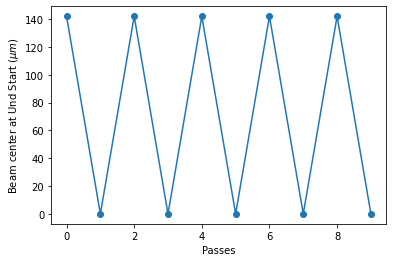

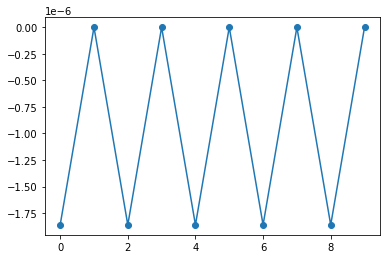

In [69]:
plt.plot(np.array(xmean)*1e6, '-o')
plt.xlabel('Passes')
plt.ylabel('Beam center at Und Start ($\mu m$)')

plt.figure()
plt.plot(np.array(angle),'-o')

Text(0, 0.5, 'beam center (\\mu m)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


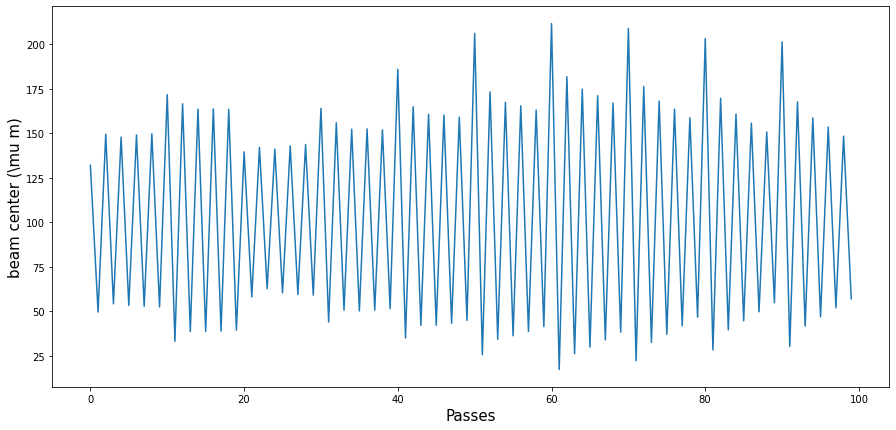

In [60]:
folder_name = 'data_long_stats_400_w0r'
result = []
extrac = []
nRound=10

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[6])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)

plt.figure(figsize = (15,7))
plt.plot(result)
plt.xlabel('Passes', fontsize = 15)
plt.ylabel('beam center (\mu m)', fontsize = 15)

In [185]:
a = np.array([[1,2],[3,4]])
b = np.array([7,8])

In [188]:
np.dot(b,a)

array([31, 46])

In [115]:
f = 50
x = 1
L = 75
dtheta1 = 100e-9
dtheta2 = 200e-9
M1 = drift(L - x)
M2 = Merror(dtheta1)
M3 = drift(x)
M4 = lens(f)
M5 = drift(x)
M6 = Merror(dtheta2)
M7 = drift(L-x)

xinit = (0, 0, 1)
Mtotal =np.dot(M7, np.dot(M6, np.dot(M5,np.dot(M4,np.dot(M3,np.dot(M2, M1))))))

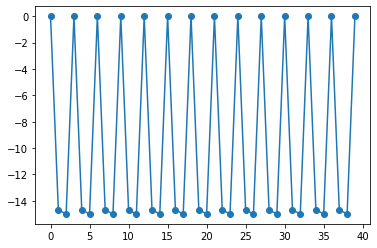

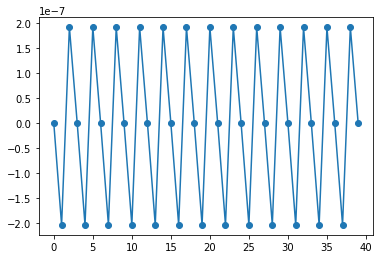

In [116]:
x_rec = []
ang_rec = []
x = np.array([0,0,1])
for _ in range(40):
    x_rec.append(x[0])
    ang_rec.append(x[1])
    x = np.dot(Mtotal, x)
plt.plot(np.array(x_rec)*1e6,'-o')
plt.figure()
plt.plot(ang_rec,'-o')

In [72]:
ang_rec

[0,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06,
 1.6940658945086007e-21,
 -9.333333333333336e-06,
 -1.8666666666666672e-05,
 -9.333333333333334e-06]

In [42]:
f = 75
x = 10
dtheta = 100e-6
drift0 = drift(x)
Merror1 = Merror(dtheta)
drift1 = drift(f-x)
lens1 = lens(f)
drift2 = drift(f)


xinit = (0, 0, 1)
Mtotal =np.dot(drift2,np.dot(lens1,np.dot(drift1,np.dot(Merror1, drift0))))

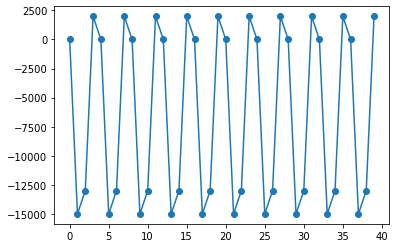

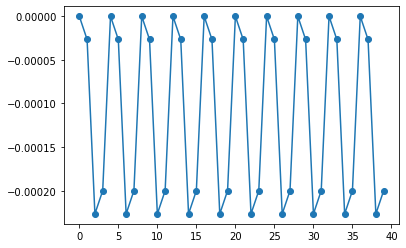

In [43]:
x_rec = []
ang_rec = []
x = np.array([0,0,1])
for _ in range(40):
    x_rec.append(x[0])
    ang_rec.append(x[1])
    x = np.dot(Mtotal, x)
plt.plot(np.array(x_rec)*1e6,'-o')
plt.figure()
plt.plot(ang_rec,'-o')

In [41]:
x_rec

[0,
 -0.015,
 -0.011,
 0.004,
 0.0,
 -0.015000000000000001,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036,
 0.0,
 -0.015000000000000005,
 -0.011,
 0.0040000000000000036]

In [1]:
import numpy as np
from rfp2 import *

In [6]:
dfl1  = read_dfl('data_3GeV_short1/tap0.04_K0.477_n10.out.dfl', ncar = 181)
dfl2 = read_dfl('data_3GeV_short1/n10_field_transmit_round0.dfl', ncar = 181)
dfl3 = read_dfl('data_3GeV_short1/n11_seed_init.dfl', ncar = 181)

1.8929736614227295 seconds to read in fld array (120986373,)
read 3693 slices
0.0005314350128173828 seconds to reshape fld array (3693, 181, 181)
3.873426914215088 seconds to read in fld array (268509156,)
read 8196 slices
7.3909759521484375e-06 seconds to reshape fld array (8196, 181, 181)
3.686544179916382 seconds to read in fld array (268509156,)
read 8196 slices
6.4373016357421875e-06 seconds to reshape fld array (8196, 181, 181)


In [3]:
zsep = 50
xlamds = 1.7834064e-10
cspeed = 299792458 
dt = zsep*xlamds/cspeed

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


norm = 5271077695328.973     energy = 156.8  uJ    t , y  mean = -3.7 fs , 0.1 um      t , y  rms = 9.1 fs , 33.9 um     wt , wy = 18.2 fs , 67.8 um     t , y  fwhm = 12.4 fs , 56.7 um


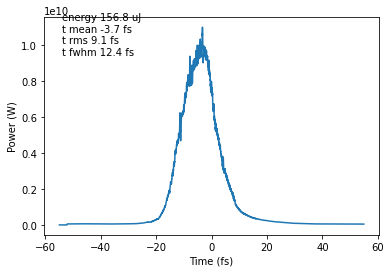

In [4]:
plot_fld_power(dfl1, dt)

norm = 2887613741416.957     energy = 85.9  uJ    t , y  mean = -17.9 fs , 0.1 um      t , y  rms = 24.5 fs , 36.9 um     wt , wy = 49.0 fs , 73.8 um     t , y  fwhm = 14.4 fs , 60.9 um


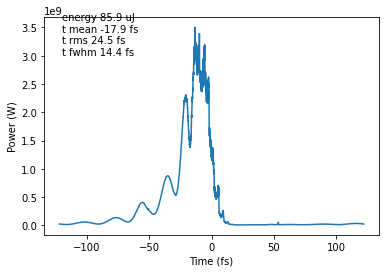

In [5]:
plot_fld_power(dfl2, dt)

norm = 774033774198.3033     energy = 23.0  uJ    t , y  mean = -24.4 fs , 0.3 um      t , y  rms = 30.6 fs , 33.3 um     wt , wy = 61.2 fs , 66.6 um     t , y  fwhm = 34.4 fs , 44.8 um


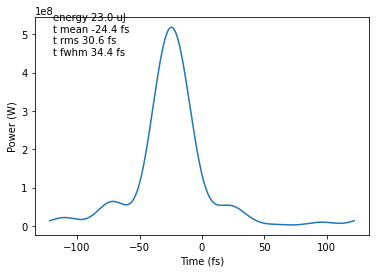

In [7]:
plot_fld_power(dfl3, dt)

In [8]:
(156.8 - 23)/156.8

0.8533163265306123